In [1]:
import pandas as pd 
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import StandardScaler

np.random.seed(2)

Using TensorFlow backend.


In [2]:
data = pd.read_csv(r"C:\Users\Ruzan\Documents\github\credit_card_data2018\creditcard.csv",low_memory=False)

# Data Visulization and Pre-prcessing 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#data types
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [5]:
#This indicates we have no missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# 0 < - represents legal Transcation's 
# 1 < - represents fraud Transcation's
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#Percentage of Legal and Fruadulent Transcation's
LegalT = round(data['Class'].value_counts()[0]/len(data)*100,2)
FruadT = round(data['Class'].value_counts()[1]/len(data)*100,2)
print('Legal Transcation\'s {} of the dataset'.format(LegalT))
print('Fraud Transcation\'s {} of the dataset'.format(FruadT))

Legal Transcation's 99.83 of the dataset
Fraud Transcation's 0.17 of the dataset


Text(0.5, 1.0, "Class Distribution \\, (0:Legal Transcation's || 1:Fraud Transcation's)")

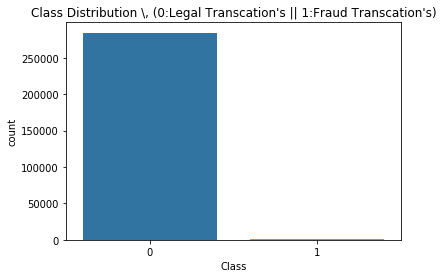

In [8]:
sns.countplot('Class', data=data)
plt.title('Class Distribution \, (0:Legal Transcation\'s || 1:Fraud Transcation\'s)')

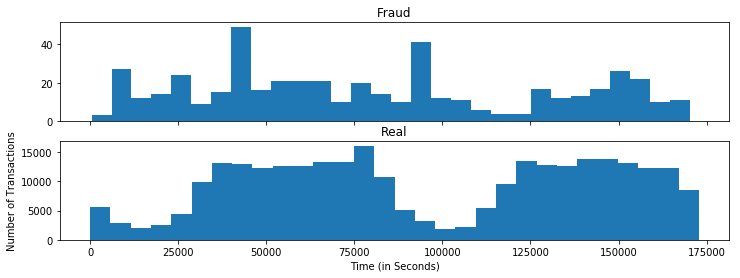

In [9]:
# we can see the fraudelent datat is not very stable, but 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Real')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [10]:
#Scaling the data and droping coloum's
data["normalized Amount"] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Time'],axis=1)

In [11]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
#splitting data in X and Y Variable
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [13]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state=0)

In [15]:
X_train.shape

(199364, 29)

In [16]:
X_test.shape

(85443, 29)

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Neural Network Model

In [18]:
from keras.models import Sequential #layer formation is one after another
from keras.layers import Dense #layers will be dense layers
from keras.layers import Dropout # we will dropout some layers or else it could lead to overfit
#input_dim = 29 is the number of coloums you need you ANN to train on.
#units = 16 are the nodes which you need to mention in the layer.
#dropout layer 0.5 we will have 0.5 % probablity of dropping each node.


In [19]:
model = Sequential([
    Dense(units=16,input_dim = 29 ,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(15,activation='relu'),
    Dense(12,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
#to check if all the parameter's are being trained.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                375       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 1,468
Trainable params: 1,468
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [21]:
#optimizer used is Adam is for Stocastic gradient descent (row by row optimization)

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=7)

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
199364/199364 [==============================] - 17s 85us/step - loss: 0.0090 - acc: 0.9983
Epoch 2/7
199364/199364 [==============================] - 17s 84us/step - loss: 0.0038 - acc: 0.9993
Epoch 3/7
199364/199364 [==============================] - 16s 80us/step - loss: 0.0035 - acc: 0.9993
Epoch 4/7
199364/199364 [==============================] - 16s 80us/step - loss: 0.0034 - acc: 0.9993
Epoch 5/7
199364/199364 [==============================] - 16s 81us/step - loss: 0.0033 - acc: 0.9994
Epoch 6/7
199364/199364 [==============================] - 16s 81us/step - loss: 0.0033 - acc: 0.9993
Epoch 7/7
199364/199364 [==============================] - 16s 81us/step - loss: 0.0032 - acc: 0.9994


In [23]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 13us/step


In [24]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [26]:
print(cnf_matrix)

[[85272    24]
 [   27   120]]


Confusion matrix, without normalization
[[85272    24]
 [   27   120]]


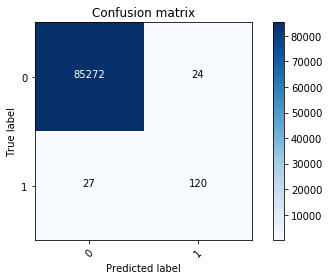

In [27]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [28]:
#28 peoople where still able to steal from us 
#21 people where miss classified as stealers but where actual customers who where not in the country

Confusion matrix, without normalization
[[284239     76]
 [    81    411]]


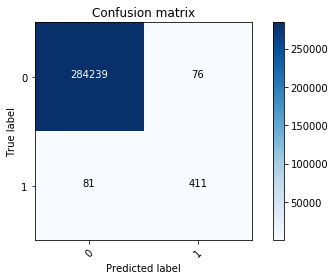

In [29]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# Under-sampling Technique 

In [30]:
#number of cases where the data has fraudulent transaction's
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [31]:
#number of cases where the data has normal transaction's
normal_indices = data[data.Class == 0].index
number_records_normal = len(normal_indices)
print(number_records_normal)

284315


In [32]:
#creating twice the number of random samples in fraudulent transaction's
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [33]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [34]:
under_sample_data = data.iloc[under_sample_indices,:]


In [35]:
#dividing the data in X an y again after sampling 
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != "Class"]
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == "Class"]

In [36]:
# Train - Test split 
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [37]:
#converting everthing in to array's
"""X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.array(y_train)
X_test = np.array(y_test)"""

'X_train = np.array(X_train)\nX_test = np.array(X_test)\nX_train = np.array(y_train)\nX_test = np.array(y_test)'

In [38]:
print (len(X_train))
print (len(X_test))

688
296


In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                375       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 1,468
Trainable params: 1,468
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=7)

Epoch 1/7
688/688 [==============================] - 1s 1ms/step - loss: 0.3979 - acc: 0.9113
Epoch 2/7
688/688 [==============================] - 0s 93us/step - loss: 0.2431 - acc: 0.9259
Epoch 3/7
688/688 [==============================] - 0s 92us/step - loss: 0.1667 - acc: 0.9346
Epoch 4/7
688/688 [==============================] - 0s 98us/step - loss: 0.1605 - acc: 0.9375
Epoch 5/7
688/688 [==============================] - 0s 102us/step - loss: 0.1573 - acc: 0.9360
Epoch 6/7
688/688 [==============================] - 0s 100us/step - loss: 0.1541 - acc: 0.9390
Epoch 7/7
688/688 [==============================] - 0s 98us/step - loss: 0.1464 - acc: 0.9419


Confusion matrix, without normalization
[[162   0]
 [ 12 122]]


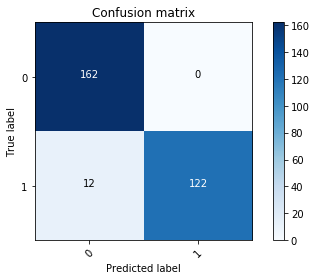

In [41]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Conclsion this is not a good technique because it can make the data extremly baised and give us unusal result.
there is a better way of sampling that is SMOTE, which comes udner OverSampling.

# SMOTE (Over-Sampling Technique)

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [44]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [45]:
X_train, X_test, y_train ,y_test = train_test_split(X_resample, y_resample,test_size = 0.3)

In [46]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=7)

Epoch 1/7
398041/398041 [==============================] - 34s 84us/step - loss: 0.0342 - acc: 0.9881
Epoch 2/7
398041/398041 [==============================] - 34s 86us/step - loss: 0.0134 - acc: 0.9965
Epoch 3/7
398041/398041 [==============================] - 35s 88us/step - loss: 0.0109 - acc: 0.9972
Epoch 4/7
398041/398041 [==============================] - 34s 85us/step - loss: 0.0098 - acc: 0.9976
Epoch 5/7
398041/398041 [==============================] - 34s 86us/step - loss: 0.0092 - acc: 0.9979
Epoch 6/7
398041/398041 [==============================] - 35s 87us/step - loss: 0.0087 - acc: 0.9980
Epoch 7/7
398041/398041 [==============================] - 34s 86us/step - loss: 0.0081 - acc: 0.9982


Confusion matrix, without normalization
[[84997   263]
 [   60 85269]]


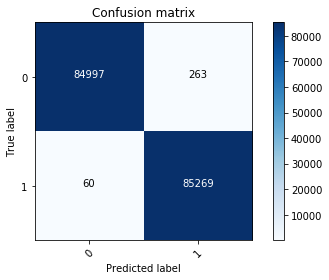

In [48]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()